Integrantes:
Alberto Bella,
Fernando Contreras,
Ignacio Morandé

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from plotnine import *
from sklearn import preprocessing
from tensorflow.keras import *
import matplotlib.pyplot as plt

# Predicción de COVID-19 (parte 1)
Como sabemos, el COVID-19 a causado estratagos a nivel mundial. El número de casos a aumentado en forma significativa y Chile no ha dejado de ser la excepción. Para esta tarea se le pide, utilizando redes neuronales recurrentes (básica, LSTM, o GRU), predecir el número de nuevos contagiados en Chile para los próximos 7 días después de la fecha de entrega oficial (entre el 9 de Junio y 15 de Junio).

La data de Chile y el mundo la podrá bajar en https://ourworldindata.org/coronavirus-source-data.

Evaluación:
1. Código y evaluación del modelo implementado (2 puntos)
2. Competencia basado en el MSE (1.5 puntos)

In [ ]:
file = pd.read_csv('owid-covid-data.csv')
file.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,9.155900e+04,91556.000000,90546.000000,8.158800e+04,81744.000000,90546.000000,91070.000000,91067.000000,90062.000000,81112.000000,81268.000000,90062.000000,76127.000000,9514.000000,9514.000000,11810.000000,11810.000000,861.000000,861.000000,1496.000000,1496.000000,4.264200e+04,4.233500e+04,42335.000000,42642.000000,4.943600e+04,49436.000000,46602.000000,46003.000000,1.399200e+04,1.319600e+04,1.043200e+04,1.170600e+04,2.411300e+04,13992.000000,13196.000000,10432.000000,24113.000000,79888.000000,9.403300e+04,88007.000000,84821.000000,83865.000000,84351.000000,85107.000000,57524.000000,85213.000000,87273.000000,66697.000000,65720.000000,42808.000000,77677.000000,89886.000000,85377.000000,3344.000000
mean,9.784269e+05,6057.723000,6087.444522,2.695429e+04,146.856858,131.624047,12022.333532,76.103579,76.455377,269.698262,1.562355,1.400363,1.006635,1090.637902,27.036397,4779.840220,174.353274,263.849706,18.555899,3544.367828,90.571594,4.642596e+04,7.069501e+06,281.157982,2.061621,4.410040e+04,1.970404,0.088752,161.409206,2.409622e+07,1.304478e+07,7.319786e+06,5.769301e+05,2.795793e+05,19.960923,13.382314,7.941950,3092.451126,58.556491,1.257171e+08,382.951949,30.572745,8.796292,5.569450,19291.439561,13.384485,258.230468,7.905022,10.554461,32.681016,50.860077,3.028804,73.233150,0.727618,18.177156
std,6.740115e+06,38084.835915,37844.741642,1.605199e+05,802.303895,743.582105,22484.417774,198.004563,158.786671,493.164593,3.993422,3.050525,0.352242,2949.084109,27.505056,12110.973431,213.710120,577.423146,36.170046,11010.937100,215.518641,1.719561e+05,3.118741e+07,648.163105,5.885175,1.552717e+05,4.948690,0.096982,887.215930,1.215268e+08,5.759429e+07,3.128562e+07,2.615222e+06,1.747215e+06,27.439458,16.857038,12.082649,4481.377516,21.188098,6.828473e+08,1782.919125,9.131847,6.215556,4.240414,19973.566709,19.953150,118.934419,4.112631,10.446066,13.478014,31.760567,2.460220,7.561919,0.150391,36.279736
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,-76.445000,-10.921000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.391720e+05,0.000000e+00,0.000000,-23.010000,0.000000e+00,0.000000,0.000000,1.300000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-95.590000
25%,1.140000e+03,2.000000,7.286000,5.100000e+01,0.000000,0.000000,239.011750,0.207000,1.252000,7.702000,0.000000,0.000000,0.840000,32.000000,4.793000,120.000000,23.795000,2.254000,0.604000,7.373750,2.616750,1.565000e+03,1.467400e+05,13.143500,0.135000,1.638000e+03,0.134000,0.017000,7.800000,9.337225e+04,7.293400e+04,3.852575e+04,4.003500e+03,8.450000e+02,1.

In [ ]:
file.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


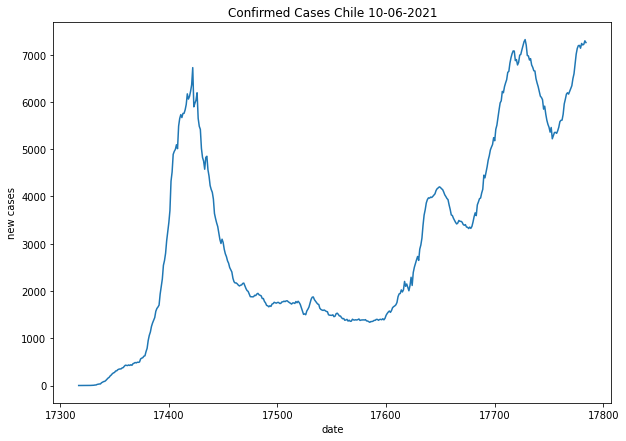

In [ ]:
plt.figure(figsize=(10, 7))
plt.title('Confirmed Cases Chile 10-06-2021')
plt.xlabel('date')
plt.ylabel('new cases')
plt.plot(file.loc[file['location']=="Chile", ['new_cases_smoothed']])
plt.show()

In [ ]:
datos = file.loc[file['location']=="Chile", ['new_cases_smoothed']]
datos = np.array(datos)
print(datos.shape)
datos = np.nan_to_num(datos)
datos = pd.DataFrame(datos)
print(type(datos))
print("Datos: ", datos)

(473, 1)
<class 'pandas.core.frame.DataFrame'>
Datos:              0
0       0.000
1       0.000
2       0.000
3       0.000
4       0.000
..        ...
468  7238.429
469  7207.000
470  7219.714
471  7294.286
472  7256.429

[473 rows x 1 columns]


In [ ]:
Tp = 400
train, test = datos[0:Tp], datos[Tp:len(datos)]
timeSteps = 5
numDim = 1
train = np.array(train)
test = np.array(test)
print(type(train))

<class 'numpy.ndarray'>


In [ ]:
"""
[1, ->  [[1,2,3],[4]],
 2,     [[2,3,4],[5]],
 3,     [[3,4,5],[6]],
 4,     [[4,5,6],[7]],
 5,     [[5,6,7],[8]],
 6,     [[6,7,8],[9]],
 7,
 8,
 9]
"""

def convertToMatrix(data, timeSteps):
    X, Y =[], []
    for i in range(len(data)-timeSteps):
        d=i+timeSteps  
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

trainX, trainY = convertToMatrix(train, timeSteps)
testX, testY = convertToMatrix(test, timeSteps)
#print("TrainX: ", trainX)
#print("TrainY: ", trainY)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1],1))
testX = np.reshape(testX, (testX.shape[0],testX.shape[1],1))

In [ ]:
inputLayer = layers.Input(shape=(timeSteps, numDim))
hiddenLayer = layers.SimpleRNN(units=20, activation="tanh", use_bias=True,return_sequences=False,return_state=False)(inputLayer)
outputLayer = layers.Dense(units=1,activation="linear")(hiddenLayer)
RNN = models.Model(inputLayer, outputLayer)
print(RNN.summary())

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 5, 1)]            0         
_________________________________________________________________
simple_rnn_17 (SimpleRNN)    (None, 20)                440       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
RNN.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['MeanSquaredError'])
history = RNN.fit(trainX,trainY, epochs=100, batch_size=16, validation_data=(testX, testY), verbose=0)
print(history.history['mean_squared_error'])
trainPredict = RNN.predict(trainX)
testPredict= RNN.predict(testX)

[8624212.0, 8621512.0, 8618994.0, 8616470.0, 8613958.0, 8611434.0, 8608923.0, 8606467.0, 8603966.0, 8601431.0, 8598967.0, 8596450.0, 8593958.0, 8591466.0, 8588961.0, 8586460.0, 8583995.0, 8581501.0, 8578991.0, 8576489.0, 8573975.0, 8571488.0, 8568999.0, 8566517.0, 8564037.0, 8561538.0, 8559034.0, 8556528.0, 8554071.0, 8551606.0, 8549123.0, 8546653.0, 8544128.0, 8541646.0, 8539183.0, 8536686.0, 8534165.0, 8531699.0, 8529230.0, 8526721.0, 8524244.0, 8521808.0, 8519309.0, 8516808.0, 8514333.0, 8511800.0, 8509327.0, 8506875.0, 8504408.0, 8501905.0, 8499416.0, 8496965.0, 8494510.0, 8492032.0, 8489603.0, 8487127.0, 8484635.0, 8482174.0, 8479689.0, 8477202.0, 8474741.0, 8472287.0, 8469818.0, 8467343.0, 8464907.0, 8462438.0, 8459944.0, 8457440.0, 8454990.0, 8452570.0, 8450088.0, 8447610.0, 8445097.0, 8442717.0, 8440263.0, 8437766.0, 8435289.0, 8432807.0, 8430346.0, 8427879.0, 8425432.0, 8422961.0, 8420512.0, 8418015.0, 8415572.0, 8413139.0, 8410682.0, 8408230.0, 8405765.0, 8403311.0, 8400826.0

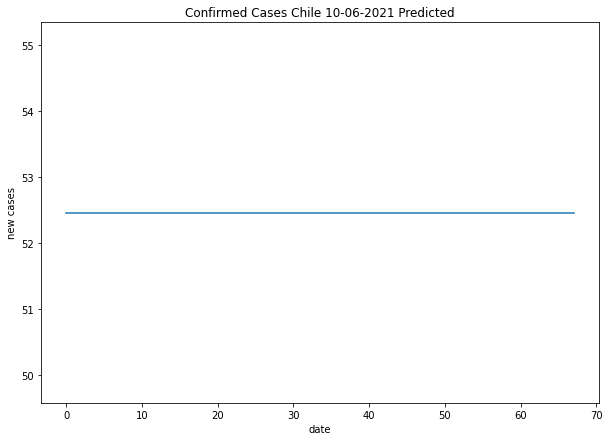

In [ ]:
plt.figure(figsize=(10, 7))
plt.title('Confirmed Cases Chile 10-06-2021 Predicted')
plt.xlabel('date')
plt.ylabel('new cases')
plt.plot(testPredict)
plt.show()

In [ ]:
trainScore = RNN.evaluate(trainX, trainY, verbose=0)
testScore = RNN.evaluate(testX, testY, verbose=0)
print(trainScore,testScore)

[8377468.5, 8377468.5] [40887812.0, 40887812.0]


# Creando tweets (parte 2)
Una de las ventajas de las redes recurrentes es su uso con texto. Una de ellas es la generación de frases, en este caso, tweets. Para la segunda parte de la tarea se le pide:
1. Extraer 100/200 tweets de alguna cuenta en twitter (a su elección). Obviamente mientras más tweets es mejor, pero lamentablemente con muchos tweets tomará mucho tiempo entrenar el modelo (1 punto). En caso que no logre extraer los datos, solicite al profesor una base de tweets (pero obtendrá 0 puntos en este caso)
2. Aprender una red neuronal recurrente (0.5 puntos).
3. Generar cuatro frases que comiencen con las palabras "La", "El", "Hoy", y alguna palabra a su elección (1 punto), las frases deberán tener entre 5 y 15 palabras (sampleadas de forma uniforme). En caso que alguna palabra base no exista en su vocablo, entonces reemplácela por alguna otra palabra común. Además, en vez de considerar la palabra con mayor probabilidad para generar la frase, considere una palabra sampleada desde las 10 palabras con mayor probabilidad, con probabilidad proporcional a su valor (recuerde estandarizar las probabilidades para que no sea una distribución uniforme). De esta forma no generará siempre la misma palabra.

En su entrega final, usted debera entregar el código y la base de datos correspondiente. 

para solucionar esta tarea recuerde la actividad, usted deberá:
1. Tokenizar los datos
2. Crear las secuencias las frases. Por ejemplo de la frase "Hola como estas tu?" se generan tres frases, "Hola como", "Hola como estas", y "Hola como estas tu?". Las secuencias son al menos dos palabras, ya que la última palabra de cada secuencia será la palabra a predecir.
3. Hacer padding de todas las secuencias creadas anteriormente (todas las frases tienen tamaño d)
4. Separar los datos de entrenamiento en los primeros d-1 "palabras" como entrenamiento y la última palabra como objetivo.
5. Entrenar el modelo (recuerde que la variable Y tiene que ser traspasada a one-hot-encoding)
6. Predecir una frase. Para ello, parte con una palabra inicial de su elección, prediga la segunda palabra, agreguela a su input y prediga la siguiente. Repita este rpoceso hasta que el número de palabras que ustede definió ya fueron creadas.

Por si acaso, es sumamente factible que la frase generada no haga sentido común. No se descontará puntos por este tipo de casos. Pero el código deberá correr sin problemas.

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras import *
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('ingenieriaUAI_tweets.csv', nrows=200)
data.head()

In [ ]:
#Tokenizacion, determinacion tamaño diccionario y creacion secuencias
text = data['text'].tolist()
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text) #Train tokenizer

vocab_size = len(tokenizer.word_index) + 1

encoded = tokenizer.texts_to_sequences(text) #Encoding

print(text)
print(encoded)

In [ ]:
#Padding

max_len = 40
data = pad_sequences(encoded, maxlen = max_len)
print(data)

In [ ]:
# Entrenamiento y palabra objetivo con one-hot encoding

X = data[:max_len]
y = data[-1]

y = to_categorical(y, num_classes=vocab_size)

In [ ]:
#Modelo

inputLayer = layers.Input(shape=(1,))
embeddingLayer = layers.Embedding(vocab_size, 10, input_length=1)(inputLayer)
RNNLayer = layers.SimpleRNN(units=50)(embeddingLayer)
outputLayer = layers.Dense(units=vocab_size, activation='softmax')(RNNLayer)

model = models.Model(inputLayer, outputLayer)
print(model.summary())
origWeights=model.get_weights()[2]

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=500, verbose=0)

#Checking the change of parameters of the W_{hh} matrix
finalWeights=model.get_weights()[2]
print(sum(sum(origWeights==finalWeights)))

In [ ]:
def generate_seq(model, tokenizer, seed_text, n_words):
  in_text, result = seed_text, seed_text
  # generate a fixed number of words
  for _ in range(n_words):
    # encode the text as integer
    encoded = tokenizer.texts_to_sequences([in_text])[0]
    encoded = np.array(encoded) # encode the text as integer
    
    # predict probabilities for each word
    probs = model.predict(encoded, verbose=0) # predict probs per word
    norm = np.linalg.norm(probs)
    probs = probs/norm
    yhat = np.where(probs[0] == np.amax(probs[0]))
    yhat = yhat[0] # Obtaining the word with highest probability
    
    #Cambiar probabilidades

    # map predicted word index to word
    out_word = '' # Getting the word from the tokenizer
    for word, index in tokenizer.word_index.items():
      if index == yhat:
        out_word = word
        break
    # Appending to the output and getting the new input
    in_text, result = out_word, result + ' ' + out_word
  return result

# Evaluating the model
print(generate_seq(model, tokenizer, 'La', 15))
print(generate_seq(model, tokenizer, 'El', 15))
print(generate_seq(model, tokenizer, 'Hoy', 15))
print(generate_seq(model, tokenizer, 'Este', 15))